In [187]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd
import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [230]:
#strong scaling
# tk = th.Thicket.from_caliperreader(glob("*-a65536-*.cali"))
# tk = th.Thicket.from_caliperreader(glob("*-a262144-*.cali"))
# tk = th.Thicket.from_caliperreader(glob("*-a1048576-*.cali"))
# tk = th.Thicket.from_caliperreader(glob("*-a4194304-*.cali"))
# tk = th.Thicket.from_caliperreader(glob("*-a16777216-*.cali"))
# tk = th.Thicket.from_caliperreader(glob("*-a67108864-*.cali"))
# tk = th.Thicket.from_caliperreader(glob("*-a268435456-*.cali"))

#speedup and weak
#tk = th.Thicket.from_caliperreader(glob("*-i1*.cali"))
#tk = th.Thicket.from_caliperreader(glob("*-i2*.cali"))
#tk = th.Thicket.from_caliperreader(glob("*-i3*.cali"))
tk = th.Thicket.from_caliperreader(glob("*-i4*.cali"))
#tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Total time", "Min time/rank", "Max time/rank", "Min GPU time/rank", "Max GPU time/rank", "Total GPU time", "Avg GPU time/rank"], axis=1)#,"Avg time/rank", "Min time/rank", "Max time/rank", "Total time", "Avg GPU time/rank", "Min GPU time/rank", "Max GPU time/rank", "Total GPU time"
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Total time", "Min time/rank", "Max time/rank", "Variance time/rank"], axis=1)#,"Avg time/rank", "Min time/rank", "Max time/rank", "Total time", "Avg GPU time/rank", "Min GPU time/rank", "Max GPU time/rank", "Total GPU time"
tk.dataframe

Avg time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              26865850         0.484099   
                                                  91589203       342.373510   
                                                  199775509      308.269327   
                                                  252601885        0.086370   
                                                  354753638       16.926884   
                                                  355165401        7.882896   
                                                  415101595        3.743637   
                                                  418137737        0.023629   
                                                  479771915        1.936843   
                                                  529131526        1.630629   
                                                  554940394        9.343748   
                                                  592408525      189.823315   
                                                  593509624        0.237607   
                                                  623049743        1.322898   
                                                  669730876        7.435949   
                                                  692177343        0.438536   
                                                  699309909        0.129503   
                                                  699422876        1.359504   
                                                  724851361        0.679232   
                                                  751740264      642.502690   
                                                  755558628        2.095754   
                                                  849997489        0.042509   
                                                  863712879        0.354521   
                                                  921191458        1.055738   
                                                  1113195718       0.511456   
                                                  1392686553      24.442371   
                                                  1424133250    1246.904996   
                                                  1453803686       2.161443   
                                                  1544687043       0.190864   
                                                  1574321060       0.929428   
                                                  1658662653      71.067662   
                                                  1937678388       0.050019   
                                                  2184197636       0.092658   
                                                  2239317519       9.071875   
                                                  2247765503      29.125704   
                                                  2273559652       5.700471   
                                                  2294200978      47.286995   
                                                  2310003528      11.231954   
                                                  2353398429       0.112395   
                                                  2420916316       0.044019   
                                                  2454338759      77.603956   
                                                  2517309925       4.856345   
                                                  2581687639       8.675745   
                                                  2593624457       0.861880   
                                                  2634127945       4.631151   
                                                  2764595640      41.684943   
                                                  2826818319       0.062987   
                                                  2908925362     167.216464   
                                                  2944864345       0.019567   
                                 

In [231]:
tk.metadata.columns

Index(['cali.caliper.version', 'mpi.world.size', 'spot.metrics',
       'spot.timeseries.metrics', 'spot.format.version', 'spot.options',
       'spot.channels', 'cali.channel', 'spot:node.order', 'spot:output',
       'spot:time.variance', 'launchdate', 'libraries', 'cmdline', 'cluster',
       'Algorithm', 'ProgrammingModel', 'Datatype', 'SizeOfDatatype',
       'InputSize', 'InputType', 'num_procs', 'group_num',
       'implementation_source', 'main', 'data_init', 'comm', 'comp',
       'comm_large', 'comm_small', 'comp_large', 'comp_small',
       'correctness_check'],
      dtype='object')

In [232]:
#gb = tk.groupby("InputType")
gb = tk.groupby("InputSize")

7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b329620c700>, 262144: <thicket.thicket.Thicket object at 0x2b328fddc7f0>, 1048576: <thicket.thicket.Thicket object at 0x2b328fd01400>, 4194304: <thicket.thicket.Thicket object at 0x2b328e8da220>, 16777216: <thicket.thicket.Thicket object at 0x2b329632b850>, 67108864: <thicket.thicket.Thicket object at 0x2b32963bcc70>, 268435456: <thicket.thicket.Thicket object at 0x2b329625b6a0>}


In [233]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
     metadata_key="num_procs"
)

In [234]:
ctk.dataframe

65536  \
                                                            Avg time/rank   
node                                              num_procs                 
{'name': 'main', 'type': 'function'}              2              0.026257   
                                                  4              0.019567   
                                                  8              0.011015   
                                                  16             0.012076   
                                                  32             0.023629   
                                                  64             0.050019   
                                                  128            0.237607   
                                                  256            0.929428   
                                                  512            1.359504   
                                                  1024           4.631151   
{'name': 'comm', 'type': 'function'}              2              0.010553   
                                                  4              0.004603   
                                                  8              0.003843   
                                                  16             0.008465   
                                                  32             0.021636   
                                                  64             0.048242   
                                                  128            0.236067   
                                                  256            0.927564   
                                                  512            1.356726   
                                                  1024           4.626558   
{'name': 'comm_large', 'type': 'function'}        2              0.010392   
                                                  4              0.003953   
                                                  8              0.002040   
                                                  16             0.003640   
                                                  32             0.009137   
                                                  64             0.002909   
                                                  128            0.093033   
                                                  256            0.291056   
                                                  512            0.160170   
                                                  1024           0.359269   
{'name': 'comm_small', 'type': 'function'}        2              0.000116   
                                                  4              0.000599   
                                                  8              0.001752   
                                                  16             0.004764   
                                                  32             0.012434   
                                                  64             0.045278   
                                                  128            0.142933   
                                                  256            0.636431   
                                                  512            1.196455   
                                                  1024           4.267189   
{'name': 'comp', 'type': 'function'}              2              0.015348   
                                                  4              0.014734   
                                                  8              0.007002   
                                                  16             0.003458   
                                                  32             0.001793   
                                                  64             0.001407   
                                                  128            0.000853   
                                                  256            0.000826   
                                                  512            0.000851   
                                                  1024          

In [235]:
ctk.dataframe = ctk.dataframe.reset_index().drop(("node"), axis=1)
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])
# Drop "time" label as it is redundant
#ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)


/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [236]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
num_procs = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
input_sizes = sorted(list(set(ctk.dataframe.columns.get_level_values(0))))


In [237]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(df.columns)
    plt.grid(True)
    #plt.yscale("log", base=10)
   # plt.xscale("log", base=2)
    plt.xticks(num_procs)
    plt.show()
    return fig, ax


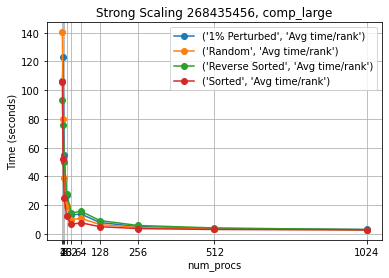

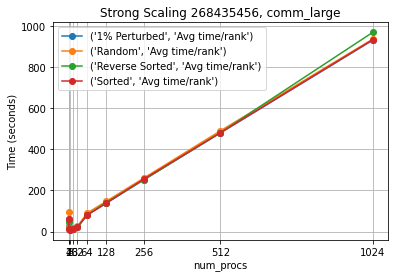

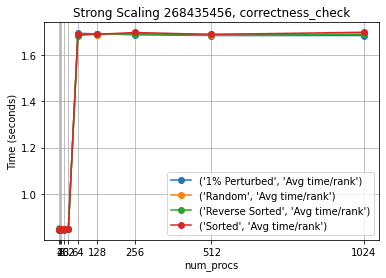

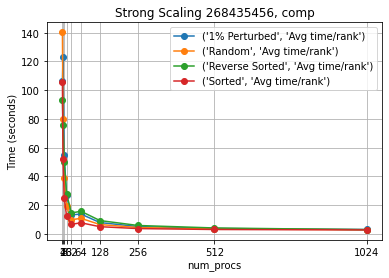

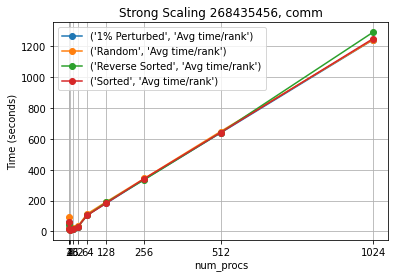

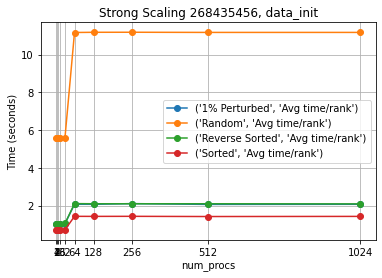

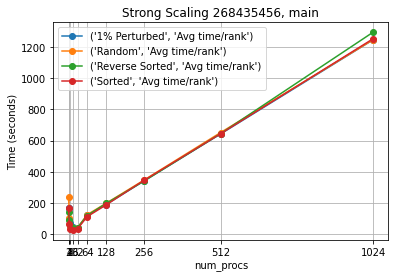

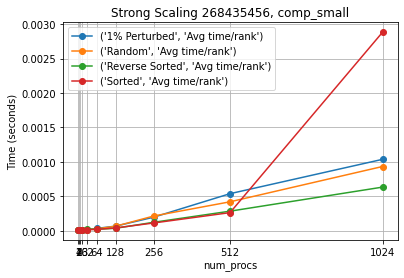

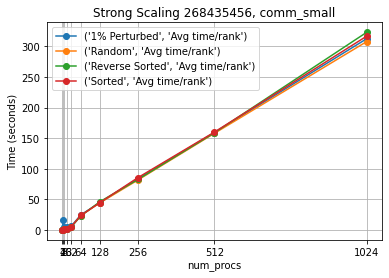

In [90]:
# Strong Scaling Plots 
# same input size, increase num of processors
for name in function_names:
    plot_mpl(
        df=ctk.dataframe.loc[name],
        title=f"Strong Scaling 268435456, {name}", 
        xlabel="num_procs",
        ylabel="Time (seconds)",
    )


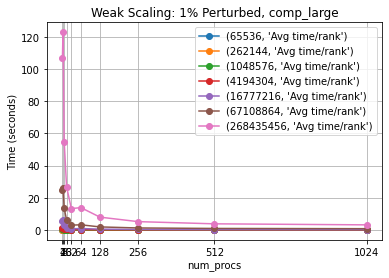

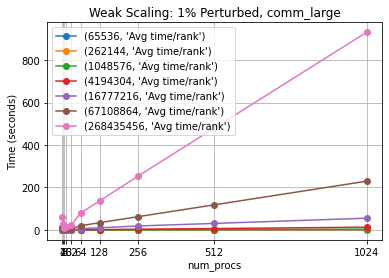

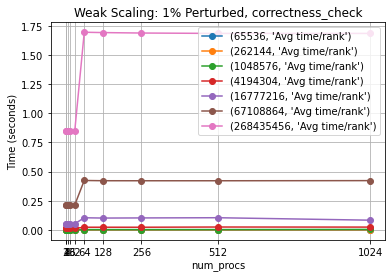

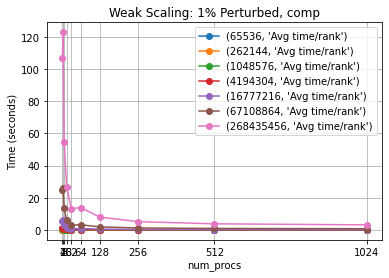

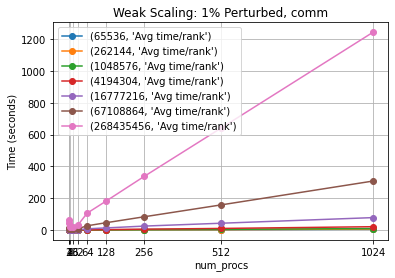

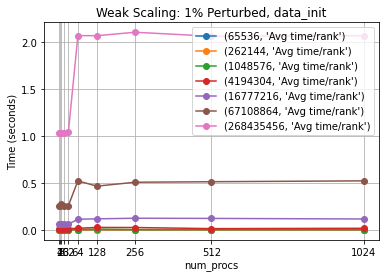

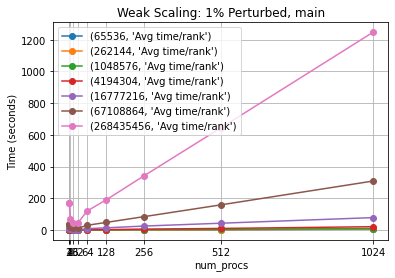

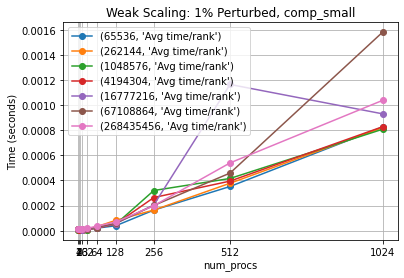

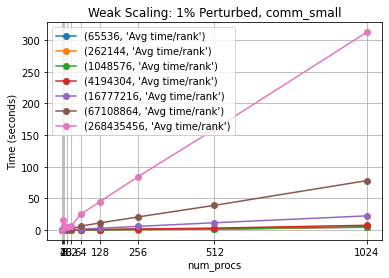

In [132]:
# Weak Scaling
for name in function_names:
    plot_mpl(
        df=ctk.dataframe.loc[name],
        title=f"Weak Scaling: 1% Perturbed, {name}", 
        xlabel="num_procs",
        ylabel="Time (seconds)",
    )

In [242]:
speedup=ctk.dataframe.loc["main",2]/ctk.dataframe.loc["main"]
#speedup=ctk.dataframe.loc["comp_large",2]/ctk.dataframe.loc["comp_large"]
#speedup=ctk.dataframe.loc["comm",2]/ctk.dataframe.loc["comm"]
speedup

,65536,262144,1048576,4194304,16777216,67108864,268435456
,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank
num_procs,,,,,,,
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,1.341902,1.213009,1.365502,1.072402,1.220002,1.238310,1.002507
8,2.383749,2.553329,2.536356,2.431608,2.423278,2.345260,2.358818
16,2.174313,3.816080,3.738130,4.778978,4.683846,3.534376,3.745985
32,1.111219,2.644028,5.604944,6.771878,6.857577,4.014150,4.021492
64,0.524941,1.784416,3.083571,4.097623,1.150830,1.362987,1.405436
128,0.110506,0.323121,0.712715,0.969609,0.692552,0.839511,0.883114
256,0.028251,0.106461,0.255063,0.431550,0.371154,0.472426,0.489628


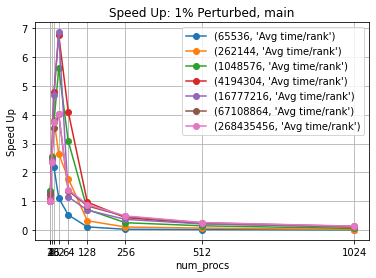

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Speed Up: 1% Perturbed, main'}, xlabel='num_procs', ylabel='Speed Up'>)

In [243]:
plot_mpl(
    df=speedup,
    title=f"Speed Up: 1% Perturbed, main", 
    xlabel="num_procs",
    ylabel="Speed Up",
)